## Continue plotting with matplotlib.pyplot
---

### 2D plotting

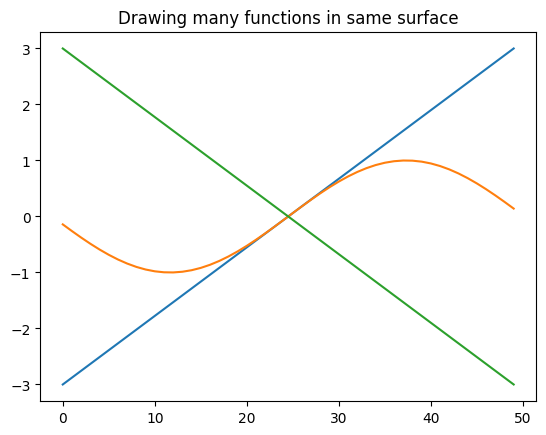

In [2]:
# multiple functions in same figure
# Code source: Kokchun Giang

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

@dataclass
class Sine:
    x: np.array

    def plot(self, ax):
        ax.plot(np.sin(self.x))

@dataclass
class Line:
    x: np.array
    slope: int = 1
    intercept: int = 0

    def plot(self, ax):
        ax.plot(self.slope*self.x + self.intercept)

ax = plt.axes()
my_sine = Sine(np.linspace(-3,3))
my_line = Line(np.linspace(-3,3))
neg_line = Line(np.linspace(-3,3), slope = -1)

for func in (my_line, my_sine, neg_line):
    func.plot(ax)

ax.set(title = "Drawing many functions in same surface");

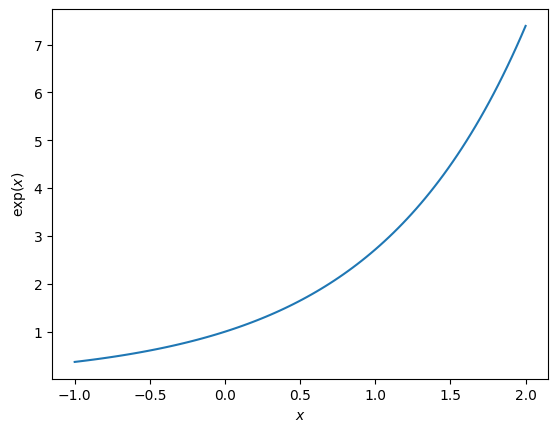

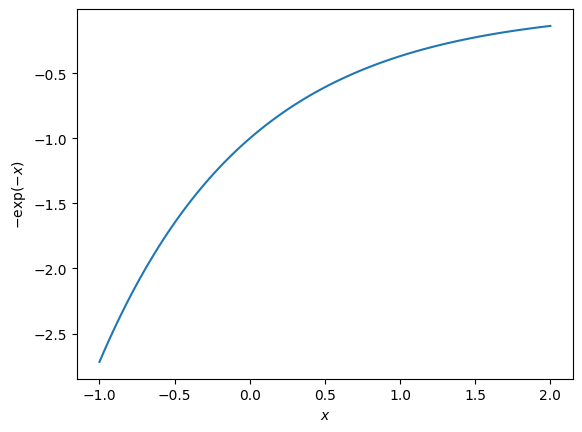

In [3]:
# Plotting exponential function
import matplotlib.pyplot as plt
import numpy as np
import math

# Code source: Óscar Nájera

x = np.linspace(-1, 2, 100)
y = np.exp(x)
plt.figure()
plt.plot(x, y)
plt.xlabel('$x$')
plt.ylabel('$\exp(x)$')
plt.figure()
plt.plot(x, -np.exp(-x))
plt.xlabel('$x$')
plt.ylabel('$-\exp(-x)$')
plt.show()

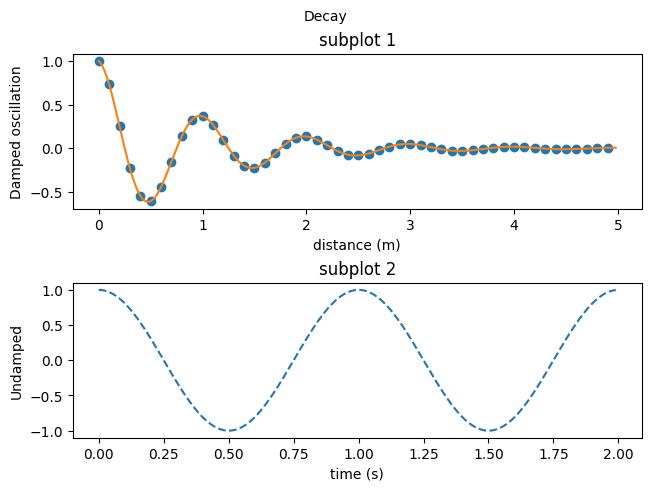

In [4]:
def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return s1 * e1

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(t1, f(t1), 'o', t2, f(t2), '-')
axs[0].set_title('subplot 1')
axs[0].set_xlabel('distance (m)')
axs[0].set_ylabel('Damped oscillation')
fig.suptitle('Decay', fontsize=10)

axs[1].plot(t3, np.cos(2*np.pi*t3), '--')
axs[1].set_xlabel('time (s)')
axs[1].set_title('subplot 2')
axs[1].set_ylabel('Undamped')

plt.show()

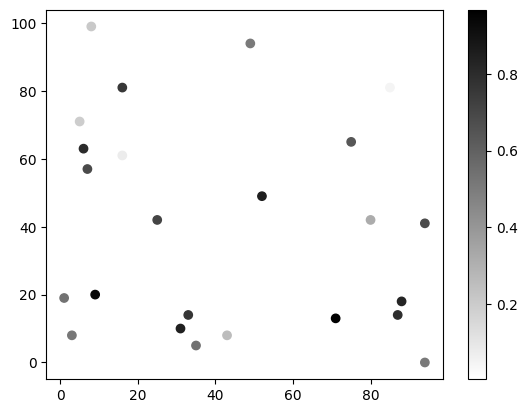

In [5]:
x = np.random.randint(100, size=25)
y = np.random.randint(100, size=25)
fit = np.random.rand(25)

plt.scatter(x, y, c=fit, cmap='binary')
plt.colorbar()

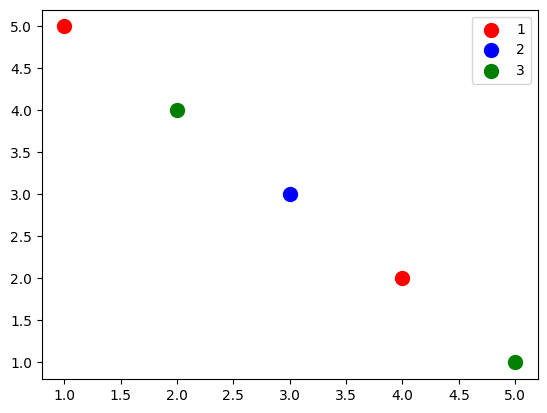

In [6]:
scatter_x = np.array([1,2,3,4,5])
scatter_y = np.array([5,4,3,2,1])
group = np.array([1,3,2,1,3])
cdict = {1: 'red', 2: 'blue', 3: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

---
### 3D plotting

[source: Three-Dimensional Plotting in Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

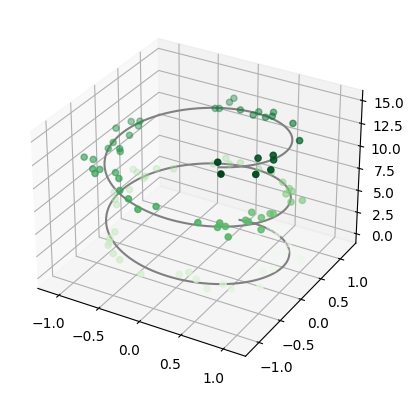

In [7]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

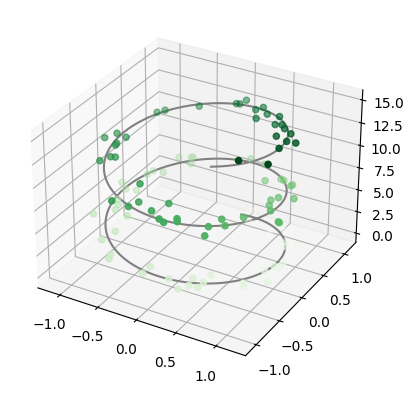

In [8]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

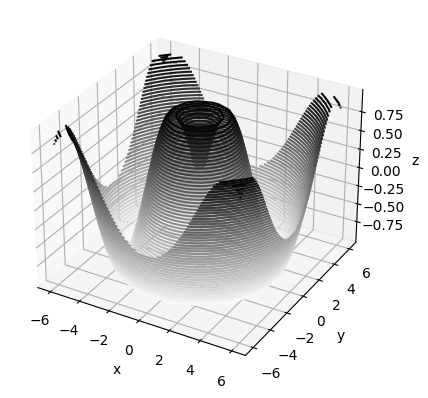

In [9]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

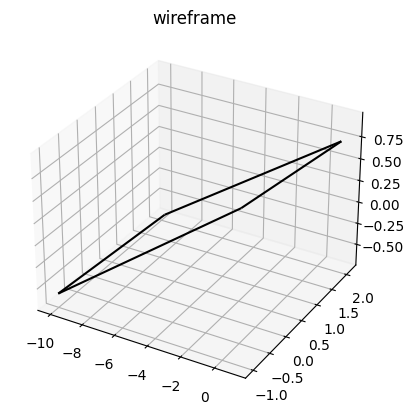

In [30]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(1, -10, 20)
y = np.linspace(-1, 2.1, 2)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');

--- 
<style>
r { color: Red }
g { color: Green }
b { color: Blue }</style>
# <r>Co<r><g>lo</g><b>rs</b>

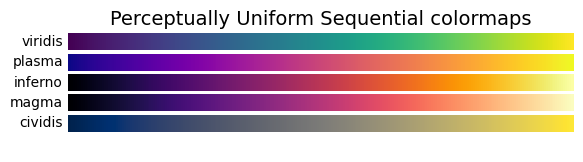

In [11]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

plot_color_gradients('Perceptually Uniform Sequential',
                     ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

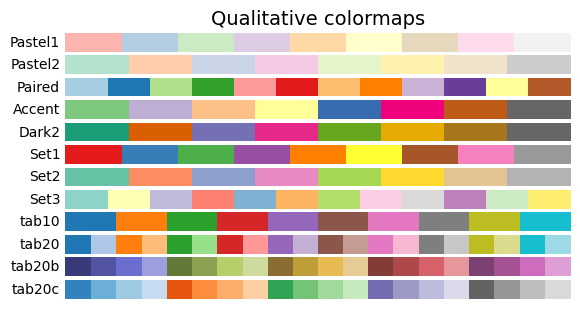

In [12]:
plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

---
### **Links**<br>

**Colors**<br>
[Tutorial, matplotlib.org](https://matplotlib.org/stable/tutorials/colors/colormaps.html)<br>
[CIELAB colorspace, Wikipedia](https://en.wikipedia.org/wiki/CIELAB_color_space)

**Colormap links:**<br>
[Turbo, Google AI blog](https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html)<br>
[Diverging Color Maps for Scientific Visualizationm,Kenneth Moreland.pdf](http://www.kennethmoreland.com/color-maps/ColorMapsExpanded.pdf)